In [8]:
modelLoads= ["AA", "AB", "BA", "BB", "infer2018"]
weightModels= ["degree", "gravity", "identical"]
randomGraphs= ["ER", "BA", "WS", "GEO"]
seeds= [10, 11, 12, 13, 14]
strains= [1, 2, 3, 4]
denses= [4, 6, 8]
nodes= [50, 100, 150]
intenses= [0, 1, 2]
identicalfs= [0.005, 0.01, 0.02]


commands1=set()
linuxThread= 3

In [10]:


#Performance on different dense
for randomGraph in randomGraphs:
    for seed in seeds:
        for dense in denses:
            command= f"python run.py --epoches {140000} --modelLoad AA --weightModel identical --randomGraph {randomGraph}\
              --seed {seed} --strains 4  --dense {dense}"
            commands1.add(command)
#Performance on different node number
for randomGraph in randomGraphs:
    for seed in seeds:
        for node in nodes:
            command= f"python run.py --epoches {140000} --modelLoad AA --weightModel identical --randomGraph {randomGraph}\
            --seed {seed} --strains 4  --n {node}"
            commands1.add(command)
#Performance on different intense
for randomGraph in randomGraphs:
    for seed in seeds:
        for intsense in intenses:
            command= f"python run.py --epoches {140000} --modelLoad AA --weightModel identical --randomGraph {randomGraph}\
              --seed {seed} --strains 4  --intense {intsense}"
            commands1.add(command)
#Performance on different identical float
for randomGraph in randomGraphs:
    for seed in seeds:
        for identicalf in identicalfs:
            command= f"python run.py --epoches {140000} --modelLoad AA --weightModel identical --randomGraph {randomGraph}\
              --seed {seed} --strains 4  --identicalf {identicalf}"
            commands1.add(command)
count=0
with open("myCommands.bat", 'w') as file:
    # Write each element on a new line
    for i, string in enumerate(commands1):
        file.write(f"echo \"{string} --CMDprogress_{i}_{len(commands1)-1}\"\n")
        file.write(f"{string} --CMDprogress_{i}_{len(commands1)-1}\n")
        
count=0
with open("myCommands.sh", 'w') as file:
    # Write each element on a new line
    for i, string in enumerate(commands1):
        file.write(f"echo \"{string} --CMDprogress_{i}_{len(commands1)-1}\"\n")
        file.write(f"{string} --CMDprogress_{i}_{len(commands1)-1} &\n")
        count+=1
        if count%linuxThread==0:
            file.write("wait\n")
    if count%linuxThread !=0:
        file.write("wait\n")
# echo "python run.py --epoches 140000 --modelLoad AA --weightModel identical --randomGraph BA --seed 14 --strains 2 --CMDprogress_78_79"
# python run.py --epoches 140000 --modelLoad AA --weightModel identical --randomGraph BA --seed 14 --strains 2 --CMDprogress_78_79 &
# echo "python run.py --epoches 140000 --modelLoad AA --weightModel identical --randomGraph BA --seed 14 --strains 3 --CMDprogress_79_79"
# python run.py --epoches 140000 --modelLoad AA --weightModel identical --randomGraph BA --seed 14 --strains 3 --CMDprogress_79_79 &
        

In [2]:
import numpy as np
import torch
import modules.evaluate as evaluate

def continious_to_sparcity(my_array, top= 400):
    # Flatten the array to a 1D array
    flat_array = my_array.flatten()

    # Sort the flattened array in descending order
    sorted_indices = np.argsort(flat_array)[::-1]

    # Set the top 400 elements to 1 and the rest to 0
    flat_array[sorted_indices[:top]] = 1
    flat_array[sorted_indices[top:]] = 0

    # Reshape the modified 1D array back to the original shape
    result_array = flat_array.reshape(my_array.shape)
    return result_array

def continious_to_sparcity_cols(my_matrix, topRow= 8):

    result_matrix = np.zeros_like(my_matrix)
    indices = np.argsort(my_matrix, axis=1)[:, -topRow:]  # Get indices of top 8 elements in each row
    row_indices = np.arange(my_matrix.shape[0])[:, None]  # Row indices to broadcast
    result_matrix[row_indices, indices] = 1
    
    return result_matrix


IMatrix= torch.eye(50, device= "cpu")

#table one

for modelLoad in modelLoads:
    for randomGraph in randomGraphs:
        print(f"{modelLoad}/{randomGraph}")
        cosines= 0
        spectrals= 0
        edges= 0
        jaccards= 0
        for seed in seeds:
            fileName= f"results/{modelLoad}/{modelLoad}_{randomGraph}_identical_{seed}_1_0_100000.npz"
            npzfile = np.load(fileName)
            # Access the arrays in the NPZ file
            Awnp= npzfile['A']
            PreAnp= npzfile['Apre']
            Aw = torch.tensor(Awnp)
            PreA = torch.tensor(PreAnp)
            links= int((torch.sum(Aw))/0.01)
            
            Aws= torch.tensor(continious_to_sparcity(Awnp, links))+IMatrix
            PreAs= torch.tensor(continious_to_sparcity(PreAnp, links))+IMatrix
            cosines+= evaluate.cosine_similarity(Aw, PreA)
            spectrals+= evaluate.spectral_analysis(Aw, PreA)
            edges+= evaluate.edge_correctness(Aws, PreAs)
            jaccards+= evaluate.jaccard_index(Aws, PreAs)
        cosines/= len(seeds)
        spectrals/= len(seeds)
        edges/= len(seeds)
        jaccards/= len(seeds)
        print(f"{cosines} {spectrals} {edges} {jaccards}")

            

c:\Users\30678\.conda\envs\tf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AA/ER


FileNotFoundError: [Errno 2] No such file or directory: 'results/AA/AA_ER_identical_10_1_0_100000.npz'

In [5]:
#table one

for randomGraph in randomGraphs:
    for strain in [1, 2, 3, 4]:
        print(f"{strain}_{randomGraph}")
        cosines= 0
        spectrals= 0
        edges= 0
        jaccards= 0
        for seed in seeds:
            try:
                fileName= f"results/AA/AA_{randomGraph}_identical_{seed}_{strain}_0_140000.npz"
                npzfile = np.load(fileName)
                # Access the arrays in the NPZ file
                Awnp= npzfile['A']
                PreAnp= npzfile['Apre']
                Aw = torch.tensor(Awnp)
                PreA = torch.tensor(PreAnp)
                links= int(torch.sum(Aw)/0.01)  
                Aws= torch.tensor(continious_to_sparcity(Awnp, links))+IMatrix
                PreAs= torch.tensor(continious_to_sparcity(PreAnp, links))+IMatrix
                cosines+= evaluate.cosine_similarity(Aw, PreA)
                spectrals+= evaluate.spectral_analysis(Aw, PreA)
                edges+= evaluate.edge_correctness(Aws, PreAs)
                jaccards+= evaluate.jaccard_index(Aws, PreAs)
            except:
                print(fileName)
                pass
        cosines/= len(seeds)
        spectrals/= len(seeds)
        edges/= len(seeds)
        jaccards/= len(seeds)
        print(f"{cosines} {spectrals} {edges} {jaccards}")


1_ER
0.6170099377632141 0.5206831097602844 0.5155383348464966 0.3473396599292755
2_ER
0.6797553896903992 0.5088510513305664 0.6000504493713379 0.4286673963069916
3_ER
0.7108282446861267 0.5454789996147156 0.649483859539032 0.4810870289802551
4_ER
0.737517237663269 0.4126984179019928 0.6843253970146179 0.5206021070480347
1_BA
0.6426976919174194 0.5832380056381226 0.5870374441146851 0.4156823754310608
2_BA
results/AA/AA_BA_identical_14_2_0_140000.npz
0.5580268502235413 0.4152252674102783 0.5169866681098938 0.3820658326148987
3_BA
results/AA/AA_BA_identical_14_3_0_140000.npz
0.5828409194946289 0.42433738708496094 0.547744870185852 0.4167214035987854
4_BA
0.7692053914070129 0.4590996205806732 0.7372485995292664 0.5843852162361145
1_WS
0.6251816749572754 0.5803717970848083 0.5507336854934692 0.3802163600921631
2_WS
0.705778956413269 0.623448371887207 0.653645396232605 0.4858359694480896
3_WS
0.7284054160118103 0.6283939480781555 0.6828382611274719 0.5195986032485962
4_WS
0.7688164710998535 

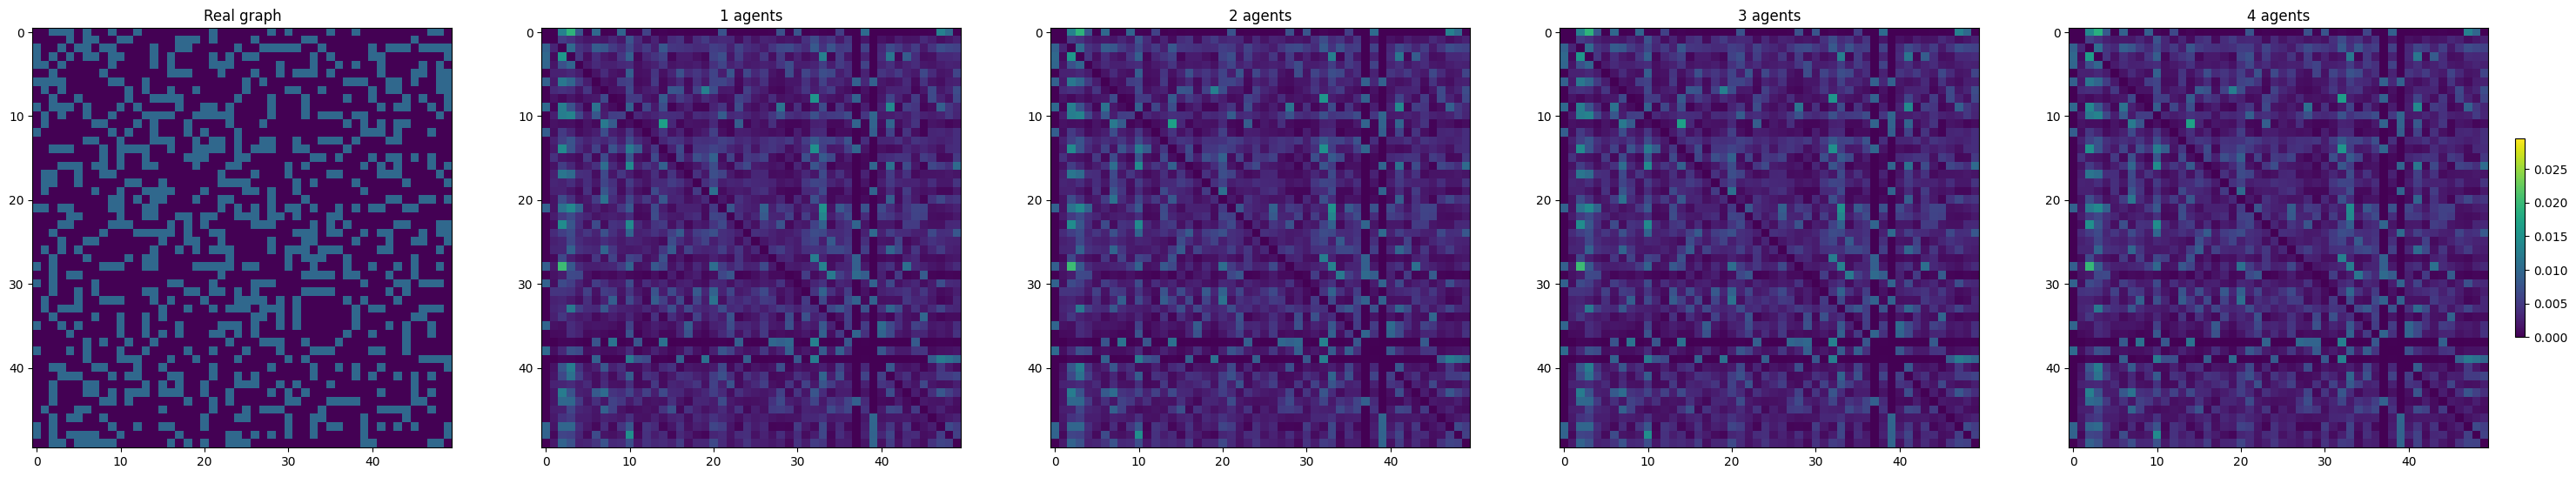

0.029502833


In [45]:
import matplotlib.pyplot as plt
import numpy as np
import modules.plotGraph as plotGraph
import networkx as nx
from matplotlib.colors import Normalize

IMatrixNp= np.eye(50)

maxValue= 0
def load_npz_matrix(fileName, maxValue):
    npzfile = np.load(fileName)
    # Access the arrays in the NPZ file
    Aw = npzfile['A']
    PreA = npzfile['Apre']
    tempMax= np.max(PreA)
    if maxValue<tempMax:
        maxValue=tempMax
    return Aw, PreA, maxValue

PreAs= []
Aw= None
for i in range(4):
    fileName= f"results/AA/AAR1_ER_identical_14_{i+1}_0_140000.npz"
    Aw, PreA, maxValue= load_npz_matrix(fileName, maxValue)
    PreAs.append(PreA)

campThis= "viridis"

plotGraph.plot_adjacenty(Aw, PreAs)
print(maxValue)

800


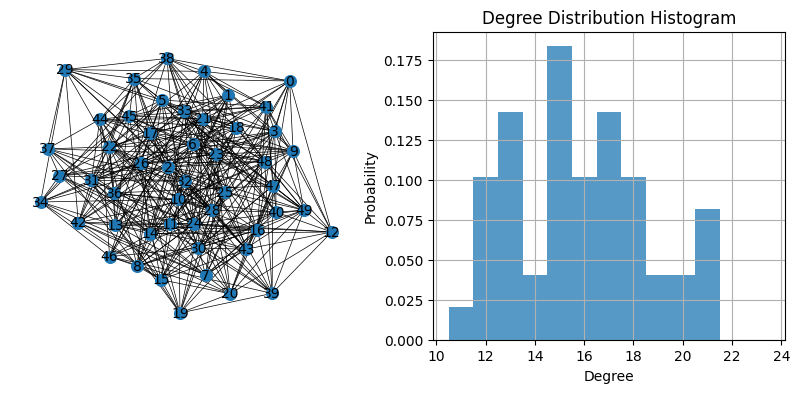

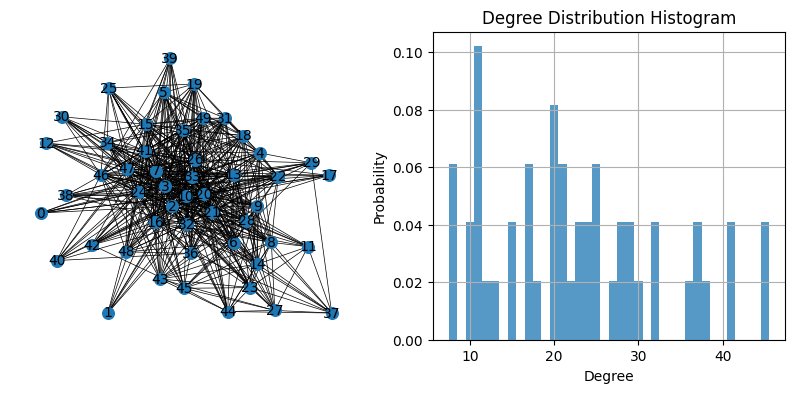

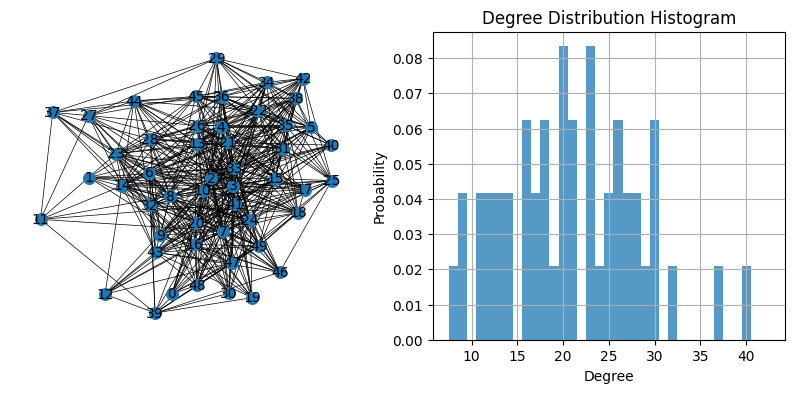

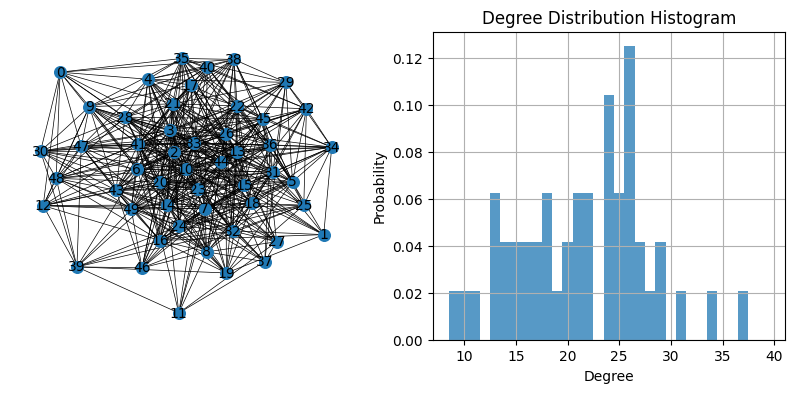

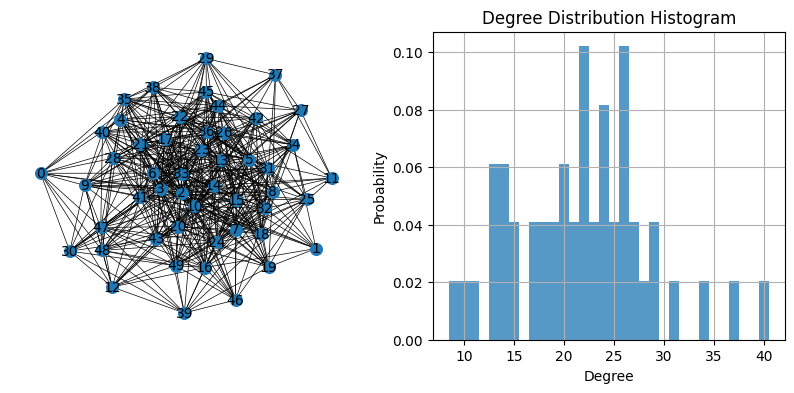

In [46]:
links= int((np.sum(Aw))/0.01)
print(links)



As= continious_to_sparcity(Aw, links)
graphA = nx.from_numpy_matrix(As)
plotGraph.plot_spring_layout(graphA)

PreAsp= continious_to_sparcity(PreAs[0], links)
graphPreA = nx.from_numpy_matrix(PreAsp)
plotGraph.plot_spring_layout(graphPreA)

PreAsp= continious_to_sparcity(PreAs[1], links)
graphPreA = nx.from_numpy_matrix(PreAsp)
plotGraph.plot_spring_layout(graphPreA)

PreAsp= continious_to_sparcity(PreAs[2], links)
graphPreA = nx.from_numpy_matrix(PreAsp)
plotGraph.plot_spring_layout(graphPreA)

PreAsp= continious_to_sparcity(PreAs[3], links)
graphPreA = nx.from_numpy_matrix(PreAsp)
plotGraph.plot_spring_layout(graphPreA)